In [1]:
import xarray as xr
import numpy as np
from sunpy.visualization.colormaps import cm

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
zarr_path = '/d0/magnetograms/hmi/preprocessed/hmi_stacks_2021_2022_96m_full.zarr'

In [3]:
hmi_stacks = xr.open_zarr(zarr_path)
hmi_stacks

<xarray.Dataset>
Dimensions:  (channel: 1, t_obs: 11, x: 4096, y: 4096)
Coordinates:
  * channel  (channel) object 'hmilos'
  * t_obs    (t_obs) datetime64[ns] 2020-01-01T07:47:51.780000 ... 2020-01-02...
Dimensions without coordinates: x, y
Data variables:
    hmi      (t_obs, channel, x, y) float32 dask.array<chunksize=(5, 1, 4096, 4096), meta=np.ndarray>

In [4]:
hmi_stacks.hmi

<xarray.DataArray 'hmi' (t_obs: 11, channel: 1, x: 4096, y: 4096)>
dask.array<open_dataset-hmi, shape=(11, 1, 4096, 4096), dtype=float32, chunksize=(5, 1, 4096, 4096), chunktype=numpy.ndarray>
Coordinates:
  * channel  (channel) object 'hmilos'
  * t_obs    (t_obs) datetime64[ns] 2020-01-01T07:47:51.780000 ... 2020-01-02...
Dimensions without coordinates: x, y
Attributes: (12/36)
    bld_vers:  ['-903', '-903', '-903', '-903', '-903', '-903', '-903', '-903...
    car_rot:   [2225, 2225, 2225, 2225, 2225, 2225, 2225, 2225, 2225, 2225, 2...
    cdelt1:    [0.5955308675765991, 0.595543161034584, 0.5955787003040314, 0....
    cdelt2:    [0.5955308675765991, 0.595543161034584, 0.5955787003040314, 0....
    crln_obs:  [66.6601486, 65.7875671, 64.9133377, 64.0368042, 63.1577187, 6...
    crlt_obs:  [-2.98802114, -2.99185014, -2.99506927, -2.99847794, -3.002843...
    ...        ...
    r_sun:     [1638.4, 1638.4, 1638.4, 1638.4, 1638.3999999999996, 1638.3999...
    rsun_obs:  [975.7177734375, 975.7379150390625, 975.796142578125, 975.8827...
    rsun_ref:  [696000000.0, 696000000.0, 696000000.0, 696000000.0, 696000000...
    t_obs:     ['2020.01.01_07:47:51.780_TAI', '2020.01.01_09:23:51.770_TAI',...
    t_rec:     ['2020.01.01_07:48:00.000_TAI', '2020.01.01_09:24:00.000_TAI',...
    telescop:  ['SDO/HMI', 'SDO/HMI', 'SDO/HMI', 'SDO/HMI', 'SDO/HMI', 'SDO/H...

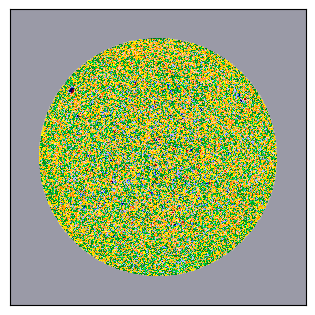

In [7]:
index = np.random.choice(np.arange(hmi_stacks.t_obs.shape[0]))
t_obs = hmi_stacks.t_obs[index].data

fig = plt.figure(figsize=[12,6], constrained_layout=True)
spec = fig.add_gridspec(ncols=4, nrows=2, wspace=0, hspace=0)

for i, channel in enumerate(hmi_stacks.channel):
    # Set colormap
    if channel.data == 'aia094':
        cmap = 'sdoaia94'
    elif 'hmi' in str(channel.data):
        cmap = 'hmimag'
    else:
        cmap = 'sdo' + str(channel.data)

    # Set vlim
    loaded_data = hmi_stacks.hmi.loc[t_obs,channel.data, :, :].load()
    if 'hmi' in str(channel.data):
        vmax = np.nanpercentile(np.abs(loaded_data), 99)
        vmin = -vmax
    else:
        vmax = np.nanpercentile(np.abs(loaded_data), 99)
        vmin = 0

    ax = fig.add_subplot(spec[i//4, i%4])
    ax.imshow(loaded_data.data, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.set_xticks([])
    ax.set_yticks([])

    

In [6]:
loaded_data

<xarray.DataArray 'aia_hmi' (x: 4096, y: 4096)>
array([[1.e-10, 1.e-10, 1.e-10, ..., 1.e-10, 1.e-10, 1.e-10],
       [1.e-10, 1.e-10, 1.e-10, ..., 1.e-10, 1.e-10, 1.e-10],
       [1.e-10, 1.e-10, 1.e-10, ..., 1.e-10, 1.e-10, 1.e-10],
       ...,
       [1.e-10, 1.e-10, 1.e-10, ..., 1.e-10, 1.e-10, 1.e-10],
       [1.e-10, 1.e-10, 1.e-10, ..., 1.e-10, 1.e-10, 1.e-10],
       [1.e-10, 1.e-10, 1.e-10, ..., 1.e-10, 1.e-10, 1.e-10]],
      dtype=float32)
Coordinates:
    channel  <U6 'hmilos'
    t_obs    datetime64[ns] 2010-06-05T07:48:09.552000
Dimensions without coordinates: x, y
Attributes: (12/54)
    acs_cgt:   ['GT3', 'GT3', 'GT3', 'GT3', 'GT3', 'GT3', 'GT3', 'GT3', 'GT3'...
    acs_eclp:  ['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', '...
    acs_mode:  ['SCIENCE', 'SCIENCE', 'SCIENCE', 'SCIENCE', 'SCIENCE', 'SCIEN...
    acs_safe:  ['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', '...
    acs_sunp:  ['YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES'...
    asd_rec:   ['sdo.lev0_asd_0004[:#2682303]', 'sdo.lev0_asd_0004[:#2703912]...
    ...        ...
    sat_z0:    [10.4429216, 10.4203882, 13.9037781, 7.86909056, 12.9632883, 1...
    t_obs:     ['2010-06-02T07:48:09.558', '2010-06-03T07:48:09.551', '2010-0...
    t_rec:     ['2010-06-02T07:48:02.000', '2010-06-03T07:48:02.000', '2010-0...
    telescop:  ['SDO/AIA', 'SDO/AIA', 'SDO/AIA', 'SDO/AIA', 'SDO/AIA', 'SDO/A...
    x0_mp:     [2047.87, 2047.87, 2047.43994, 2047.43994, 2047.43994, 2047.43...
    y0_mp:     [2048.67993, 2048.67993, 2049.27002, 2049.27002, 2049.27002, 2...